In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score, make_scorer
import itertools
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
np.set_printoptions(precision=3, suppress=True)

### Загружаем исходный датасет

In [49]:
data = pd.read_csv('../../data/data_for_model/matrix_filler_data_to_use.csv', sep=';', index_col=[0])
data.head()

,matrix_filler_ratio,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,elasticity_boxcox,surface_density_boxcox,cover_strength_boxcox
0,2.587348,1953.274926,137.627420,22.344534,234.716883,80.803222,2587.342983,246.613117,1,4.0,468.670776,85.631671,145.526898
1,2.046471,2037.631811,101.617251,23.146393,312.307205,73.817067,2624.026407,178.198556,1,5.0,312.793361,84.805005,113.632918
2,1.856476,2018.220332,135.401697,26.435515,327.510377,77.210762,2473.187195,123.344561,1,5.0,360.746332,36.659075,120.868161
3,3.305535,1917.907506,105.786930,17.874100,328.154579,72.345709,3059.032991,275.575880,1,5.0,223.892990,82.700017,145.526898
4,2.709554,1892.071124,96.563293,22.989291,262.956722,74.511359,2288.967377,126.816339,1,7.0,287.514837,108.667505,90.114645


In [50]:
data.shape

(921, 13)

In [51]:
data.isna().sum()

matrix_filler_ratio         0
density                     0
hardener                    0
epoxid                      0
temperature                 0
elasticity_on_stretching    0
solidity_on_stretching      0
resin                       0
cover_angle                 0
cover_step                  0
elasticity_boxcox           0
surface_density_boxcox      0
cover_strength_boxcox       0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matrix_filler_ratio       921 non-null    float64
 1   density                   921 non-null    float64
 2   hardener                  921 non-null    float64
 3   epoxid                    921 non-null    float64
 4   temperature               921 non-null    float64
 5   elasticity_on_stretching  921 non-null    float64
 6   solidity_on_stretching    921 non-null    float64
 7   resin                     921 non-null    float64
 8   cover_angle               921 non-null    int64  
 9   cover_step                921 non-null    float64
 10  elasticity_boxcox         921 non-null    float64
 11  surface_density_boxcox    921 non-null    float64
 12  cover_strength_boxcox     921 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 100.7 KB


In [53]:
data.describe()

,matrix_filler_ratio,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,elasticity_boxcox,surface_density_boxcox,cover_strength_boxcox
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,2.930989,1973.880774,110.553543,22.231802,285.551929,73.308572,2463.716600,217.777272,0.515744,6.919143,319.325689,74.720204,114.852667
std,0.896367,70.739502,27.286870,2.425171,39.839451,3.044072,458.124869,57.589150,0.500024,2.517057,125.388112,31.077726,27.423969
min,0.547391,1784.482245,35.599697,15.695894,179.374391,65.553336,1250.392802,63.685698,0.000000,0.037639,2.185759,0.550804,42.058229
25%,2.334624,1923.762595,91.995880,20.552568,258.434674,71.279418,2149.974687,179.581459,0.000000,5.155759,231.828999,53.396428,97.299666
50%,2.906878,1977.213130,110.310667,22.195377,285.407901,73.241464,2460.997418,216.744240,1.000000,6.939351,322.799460,75.767572,114.912508
75%,3.550392,2019.887911,130.451324,23.996259,313.077249,75.321098,2751.587084,257.066368,1.000000,8.586122,406.624956,99.013455,132.165149
max,5.314144,2161.565216,181.828448,28.955094,386.067992,81.417126,3660.450210,359.052220,1.000000,13.732404,643.825211,155.040900,186.566543


### Разбиваем исходный датасет на train и test части

In [54]:
y = data.pop('matrix_filler_ratio')
X = data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [56]:
X_train.shape, y_train.shape

((644, 12), (644,))

In [57]:
X_test.shape, y_test.shape

((277, 12), (277,))

In [58]:
X_train.describe()

,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,elasticity_boxcox,surface_density_boxcox,cover_strength_boxcox
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,1973.879417,110.047483,22.269458,286.085331,73.370355,2459.762748,218.805466,0.541925,7.007231,321.857483,73.198498,116.404553
std,70.725811,27.571228,2.419760,37.979150,3.104993,459.504786,56.482411,0.498626,2.555066,126.209170,30.678782,27.450950
min,1784.482245,35.620904,15.695894,187.977965,65.793845,1250.392802,64.524180,0.000000,0.037639,2.185759,0.550804,42.058229
25%,1924.699926,91.478011,20.621395,260.773516,71.337435,2143.834592,181.726422,0.000000,5.181633,231.925901,52.814968,97.833600
50%,1976.506124,110.384093,22.337123,285.498421,73.469304,2460.260972,219.189018,1.000000,7.003621,325.201350,74.037643,117.861541
75%,2019.751519,130.471481,23.990777,312.653930,75.409296,2735.506192,257.563889,1.000000,8.704446,408.170197,97.138884,133.973253
max,2161.565216,181.032809,28.907470,385.894771,81.417126,3660.450210,355.758697,1.000000,13.732404,643.825211,154.436056,186.566543


In [59]:
X_test.describe()

,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,elasticity_boxcox,surface_density_boxcox,cover_strength_boxcox
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,1973.883929,111.730086,22.144256,284.311817,73.164933,2472.908948,215.386815,0.454874,6.714344,313.439498,78.258034,111.244674
std,70.899365,26.625967,2.439845,43.908861,2.897862,455.595810,60.120252,0.498861,2.418511,123.483405,31.760948,27.067793
min,1813.234600,35.599697,16.048978,179.374391,65.553336,1264.310682,63.685698,0.000000,0.145034,16.789628,1.361776,43.721242
25%,1920.694722,94.895267,20.350601,254.922843,71.130371,2160.777729,172.574106,0.000000,5.069931,231.570433,55.874673,95.941604
50%,1978.553160,110.099044,21.982327,285.319055,72.958416,2462.883243,214.329895,0.000000,6.756565,317.193154,79.769383,110.681655
75%,2020.309903,129.947268,24.072208,314.813200,75.166596,2796.458345,254.154154,1.000000,8.355593,395.975663,102.445069,128.130212
max,2158.794836,181.828448,28.955094,386.067992,81.053293,3654.434359,359.052220,1.000000,13.653987,608.247354,155.040900,186.500442


### Временно убираем категориальный признак из основного датасета и сохраняем в отдельной переменной

In [60]:
cover_angle_train = pd.DataFrame(X_train.pop('cover_angle'))
cover_angle_test = pd.DataFrame(X_test.pop('cover_angle'))

# Осуществляем разные транформации признаков

### Нормализуем X_train
### Сначала нормализуем через MinMaxScaler (приводим значения к единому масштабу)
### Далее... Т.к. корреляция признаков с целевой переменной практически отсутствует (feature-wise), то предполагаем, что более значимым может быть взаимосвязь целевой переменной с разным набором признаков, взятых как единое целое (рецептура), т.е. по горизонтали (sample-wise). Для этого ещё дополнительно нормализуем по горизонтали через Normalizer()

In [61]:
# Приводим к единому масштабу данных от 0 до 1
scaler_minmax = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler_minmax.transform(X_train), index=X_train.index, columns=X_train.columns.tolist())

# Сохраняем Scaler (для дальнейшего использования в релизе модели)
pickle.dump(scaler_minmax, open('../../app/model_to_use/scaler_minmax_for_matrix_model.pkl', 'wb'))

In [62]:
# Нормализуем по строкам (по наблюдениям = горизонтально), а не по признакам (вертикально), т.к. по признакам корреляция с целевой переменной незначительная
cols_to_drop = ['elasticity_on_stretching', 'solidity_on_stretching']
scaler_normalize = Normalizer().fit(X_train.drop(columns=cols_to_drop))
X_train_norm = pd.DataFrame(scaler_normalize.transform(X_train.drop(columns=cols_to_drop)), index=X_train.index, columns=[f'{col}_norm' for col in X_train.drop(columns=cols_to_drop).columns.tolist()])

# Сохраняем Scaler (для дальнейшего использования в релизе модели)
pickle.dump(scaler_normalize, open('../../app/model_to_use/scaler_normalize_for_matrix_model.pkl', 'wb'))

### Попарное перемножение признаков

In [63]:
col_names = X_train.columns.tolist()
col_pair_combinations = list(itertools.combinations(col_names, 2))

X_train_cross = []

for col_pair in col_pair_combinations:
    X_train_cross.append(X_train.loc[:, col_pair].apply(lambda x: x[0] * x[1], axis=1))
    
X_train_cross = pd.DataFrame(X_train_cross).T
X_train_cross.columns = [f'{col_name[0]}_cross_{col_name[1]}' for col_name in col_pair_combinations]

# Нормализуем получившиеся значения - приводим к масштабу данных в диапазоне [0-1]
scaler_minmax_for_cross = MinMaxScaler().fit(X_train_cross)
X_train_cross_scaled = pd.DataFrame(scaler_minmax_for_cross.transform(X_train_cross), index=X_train.index, columns=X_train_cross.columns.tolist())

# Сохраняем Scaler (для дальнейшего использования в релизе модели)
pickle.dump(scaler_minmax_for_cross, open('../../app/model_to_use/scaler_minmax_for_cross_for_matrix_model.pkl', 'wb'))

### Создаём новые признаки через Метод Главных Компонент (PCA)

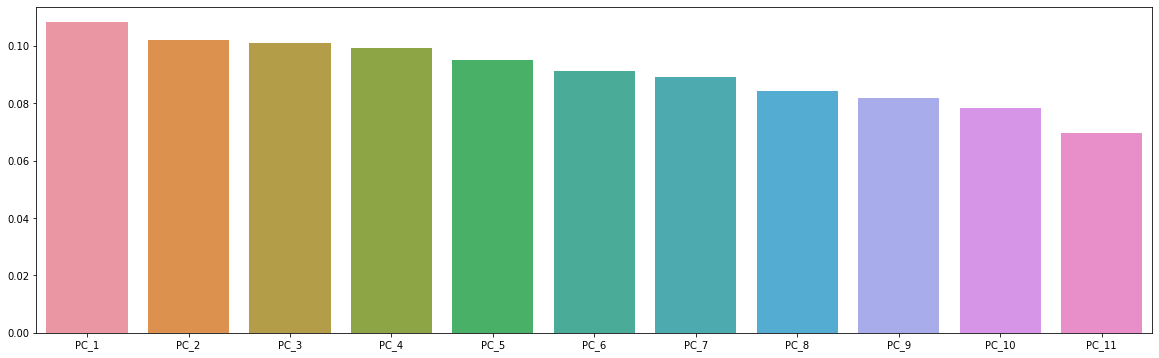

In [64]:
scaler_standard_for_pca = StandardScaler().fit(X_train)
X_train_standard = scaler_standard_for_pca.transform(X_train)

pca = PCA(random_state=42).fit(X_train_standard)
X_train_pca = pd.DataFrame(pca.transform(X_train_standard), index=X_train.index, columns=[f'PC_{i + 1}' for i in np.arange(X_train_standard.shape[1])])

plt.figure(figsize=(20, 6))
sns.barplot(x=X_train_pca.columns, y=pca.explained_variance_ratio_);

# Сохраняем Scaler (для дальнейшего использования в релизе модели)
pickle.dump(scaler_standard_for_pca, open('../../app/model_to_use/scaler_standard_for_pca_for_matrix_model.pkl', 'wb'))

# Сохраняем PCA (для дальнейшего использования в релизе модели)
pickle.dump(pca, open('../../app/model_to_use/pca_for_matrix_model.pkl', 'wb'))

# X_train to use

In [65]:
X_train_to_use = pd.concat([X_train_scaled, X_train_norm, X_train_cross_scaled, X_train_pca, cover_angle_train], axis=1)
X_train_to_use

,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_step,elasticity_boxcox,surface_density_boxcox,...,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,cover_angle
720,0.430300,0.280232,0.452102,0.769291,0.571866,0.545414,0.388295,0.508333,0.445161,0.304931,...,-0.266447,-0.288813,-0.722123,-0.001776,-0.105479,-1.017993,-1.271080,-0.498688,0.792544,1
215,0.523834,0.384239,0.546231,0.406867,0.467485,0.388534,0.462815,0.742003,0.546364,0.702887,...,0.287360,0.864023,0.281089,-0.899089,-0.960139,0.422275,0.163191,0.085495,0.563597,0
878,0.602328,0.562088,0.371849,0.677851,0.933932,0.563529,0.322144,0.725835,0.683039,0.355422,...,0.237986,0.942573,-0.666476,0.055056,-0.651437,0.098773,-2.693294,0.143618,-1.178729,1
705,0.462003,0.509037,0.580689,0.602046,0.303913,0.827865,0.509937,0.729428,0.356520,0.667698,...,0.105765,0.363254,-0.267642,-1.110098,-1.448577,-1.396831,1.110482,0.328644,-0.211287,1
504,0.622042,0.363371,0.369934,0.448336,0.816882,0.405407,0.714708,0.677459,0.404243,0.576660,...,0.758956,0.918875,0.028338,-0.313472,0.473096,0.518886,-0.402021,0.719303,-0.474846,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.646995,0.585901,0.695534,0.507378,0.716129,0.207458,0.220309,0.678388,0.767187,0.660105,...,0.358391,2.529218,0.216250,0.340197,-0.678895,-0.300910,-1.546668,0.551743,0.929838,0
891,0.552032,0.540131,0.559773,0.432290,0.501146,0.526094,0.422845,0.260752,0.456904,0.718904,...,1.074773,-0.718608,-0.706933,1.077003,-0.683850,0.726356,0.780919,-0.072268,0.092293,1
672,0.359611,0.621910,0.734813,0.673045,0.647003,0.446077,0.518440,0.973613,0.377441,0.398102,...,1.353419,0.320286,1.862444,-1.347328,-0.982485,-0.678380,-1.412894,0.059029,-0.251023,1
282,0.599190,0.394816,0.662418,0.503014,0.610995,0.538779,0.662598,0.682933,0.588455,0.348645,...,0.692831,0.277995,0.899161,-0.186805,-0.292575,0.369176,-0.403138,-1.523528,-0.931890,0


# Применяем все теже самые преобразования к X_test

In [66]:
# Re-scale X_test
X_test_scaled = pd.DataFrame(scaler_minmax.transform(X_test), index=X_test.index, columns=X_test.columns)

In [67]:
# Нормализуем по строкам
X_test_norm = pd.DataFrame(scaler_normalize.transform(X_test.drop(columns=cols_to_drop)), index=X_test.index, columns=[f'{col}_norm' for col in X_test.drop(columns=cols_to_drop).columns.tolist()])

In [68]:
# Multiply (cross-effects)

col_names = X_test.columns.tolist()
col_pair_combinations = list(itertools.combinations(col_names, 2))

X_test_cross = []

for col_pair in col_pair_combinations:
    X_test_cross.append(X_test.loc[:, col_pair].apply(lambda x: x[0] * x[1], axis=1))
    
X_test_cross = pd.DataFrame(X_test_cross).T
X_test_cross.columns = [f'{col_name[0]}_cross_{col_name[1]}' for col_name in col_pair_combinations]

X_test_cross_scaled = pd.DataFrame(scaler_minmax_for_cross.transform(X_test_cross), index=X_test_cross.index, columns=X_test_cross.columns.tolist())

In [69]:
# Apply PCA
X_test_standard = scaler_standard_for_pca.transform(X_test)
X_test_pca = pd.DataFrame(pca.transform(X_test_standard), index=X_test.index, columns=[f'PC_{i + 1}' for i in np.arange(X_test.shape[1])])

# X_test to use

In [70]:
X_test_to_use = pd.concat([X_test_scaled, X_test_norm, X_test_cross_scaled, X_test_pca, cover_angle_test], axis=1)
X_test_to_use

,density,hardener,epoxid,temperature,elasticity_on_stretching,solidity_on_stretching,resin,cover_step,elasticity_boxcox,surface_density_boxcox,...,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,cover_angle
678,0.489448,0.505435,0.279156,0.597131,0.277825,0.608053,0.531621,0.359876,0.430203,0.724165,...,-0.068883,-0.516974,-1.754332,-0.523047,0.087274,-0.114522,1.141556,0.611264,0.372284,1
240,0.148916,0.708558,0.339158,0.427791,0.837131,0.503096,0.735921,0.481394,0.509291,0.783033,...,1.192222,0.557959,-0.158650,0.062440,0.167317,2.007333,0.035267,1.943166,0.073450,0
75,0.562714,0.447560,0.564147,0.509205,0.259126,0.496327,0.308739,0.571222,0.691026,0.415291,...,-1.251153,0.604037,-0.195954,-0.299989,-0.581322,-0.736930,-0.181604,-0.682318,0.624168,0
431,0.301739,0.296502,0.747669,0.882562,0.540400,0.307497,0.853843,0.381861,0.610659,0.300270,...,1.622896,-0.257906,0.548399,-0.115710,1.500515,0.244751,-0.611796,-2.404479,1.246319,0
646,0.184554,0.727888,0.278147,0.647106,0.510697,0.005775,0.662503,0.631242,0.577695,0.558623,...,0.808598,-0.135750,0.421693,-1.795712,1.522147,1.555110,-1.270619,1.184031,1.255033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.366829,0.645489,0.234241,0.625063,0.292047,0.509096,0.573313,0.765364,0.588827,0.850519,...,0.459869,0.183392,-1.067026,-2.515222,-0.556818,0.897491,0.436138,0.871676,0.007039,1
211,0.606235,0.497843,0.505221,0.358807,0.342584,0.997504,0.801995,0.521635,0.645328,0.081973,...,-1.784960,-0.017371,0.368002,0.257289,0.225367,-0.377788,1.024484,-1.543072,-2.308480,0
693,0.139942,0.828234,0.471601,0.937845,0.221121,0.436286,0.619706,0.706294,0.558718,0.662144,...,0.841972,0.215269,-0.269302,-2.502385,0.323104,-0.580780,-0.192192,0.719380,1.040547,1
758,0.952701,0.382008,0.699488,0.322662,0.320541,0.594779,0.895429,0.468013,0.429066,0.405408,...,0.169213,0.376107,0.711544,0.380773,0.941020,-0.726090,2.070844,-1.514256,-1.481644,1


In [71]:
X_train_to_use.shape, X_test_to_use.shape

((644, 87), (277, 87))

In [72]:
X_train_to_use.shape[1]

87

# Модель регрессии

In [73]:
first_input_dim = X_train_to_use.shape[1]

regr_model = Sequential()
regr_model.add(Dense(units=500, input_dim=first_input_dim, activation='relu', kernel_initializer='random_normal', bias_initializer='he_normal'))
regr_model.add(Dropout(0.3))
regr_model.add(Dense(units=300, input_dim=500, activation='relu', kernel_initializer='random_normal', bias_initializer='he_normal'))
regr_model.add(Dropout(0.2))
regr_model.add(Dense(units=150, input_dim=300, activation='relu', kernel_initializer='random_normal', bias_initializer='he_normal'))
regr_model.add(Dropout(0.1))
regr_model.add(Dense(units=1, input_dim=150, activation='linear', kernel_initializer='random_normal', bias_initializer='he_normal'))
sgd = SGD(learning_rate=0.01, nesterov=False) 
# sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
regr_model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[])


# regr_model = Sequential()
# regr_model.add(Dense(units=400, input_dim=first_input_dim, activation='tanh', kernel_initializer='random_normal', bias_initializer='glorot_normal'))
# regr_model.add(Dropout(0.3))
# regr_model.add(Dense(units=200, input_dim=400, activation='tanh', kernel_initializer='random_normal', bias_initializer='glorot_normal'))
# regr_model.add(Dropout(0.2))
# regr_model.add(Dense(units=50, input_dim=200, activation='tanh', kernel_initializer='random_normal', bias_initializer='glorot_normal'))
# regr_model.add(Dropout(0.1))
# regr_model.add(Dense(units=1, input_dim=50, activation='linear', kernel_initializer='random_normal', bias_initializer='glorot_normal'))
# sgd = SGD(learning_rate=0.001, nesterov=False) # sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
# regr_model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[])


regr_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               44000     
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               45150     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [74]:
best_model = ModelCheckpoint('../../app/model_to_use/matrix_filler_best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [75]:
# history = regr_model.fit(X_train_to_use, y_train, epochs=1000, verbose=1, validation_split=0.3)
history = regr_model.fit(X_train_to_use, y_train, epochs=500, verbose=1, validation_data=(X_test_to_use, y_test), callbacks=[best_model])

Epoch 1/500
 1/21 [>.............................] - ETA: 6s - loss: 16.1340
Epoch 1: val_loss improved from inf to 0.92339, saving model to ../../app/model_to_use\matrix_filler_best_model.h5
21/21 [==============================] - 0s 9ms/step - loss: 3.1955 - val_loss: 0.9234
Epoch 2/500
19/21 [==========================>...] - ETA: 0s - loss: 1.0274
Epoch 2: val_loss did not improve from 0.92339
21/21 [==============================] - 0s 4ms/step - loss: 0.9945 - val_loss: 0.9522
Epoch 3/500
 1/21 [>.............................] - ETA: 0s - loss: 0.9465
Epoch 3: val_loss did not improve from 0.92339
21/21 [==============================] - 0s 4ms/step - loss: 0.9724 - val_loss: 1.2118
Epoch 4/500
 1/21 [>.............................] - ETA: 0s - loss: 1.1425
Epoch 4: val_loss improved from 0.92339 to 0.87367, saving model to ../../app/model_to_use\matrix_filler_best_model.h5
21/21 [==============================] - 0s 4ms/step - loss: 1.0327 - val_loss: 0.8737
Epoch 5/500
19/21 [

In [76]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.tail()

,loss,val_loss,epoch
495,0.175243,1.157889,495
496,0.146822,1.234820,496
497,0.165319,1.293075,497
498,0.165187,1.398421,498
499,0.181102,1.245023,499


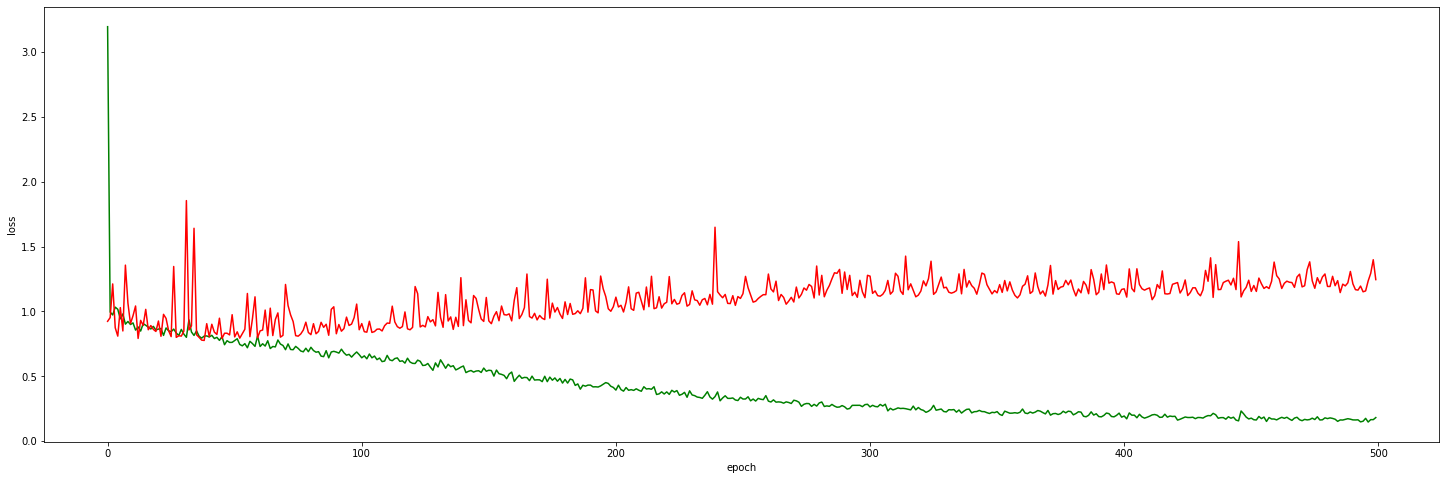

In [77]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=hist_df, x='epoch', y='loss', color='green')
sns.lineplot(data=hist_df, x='epoch', y='val_loss', color='red')
plt.show()

In [78]:
# load a saved model
matrix_filler_best_model_to_use = load_model('../../app/model_to_use/matrix_filler_best_model.h5')

In [79]:
y_train_pred = pd.DataFrame(matrix_filler_best_model_to_use.predict(X_train_to_use), index=y_train.index)
r2_score(y_train, y_train_pred)

21/21 [==============================] - 0s 2ms/step


0.13584848490564227

In [80]:
y_test_pred = pd.DataFrame(matrix_filler_best_model_to_use.predict(X_test_to_use), index=y_test.index)
r2_score(y_test, y_test_pred)

9/9 [==============================] - 0s 2ms/step


-0.010543700726973082

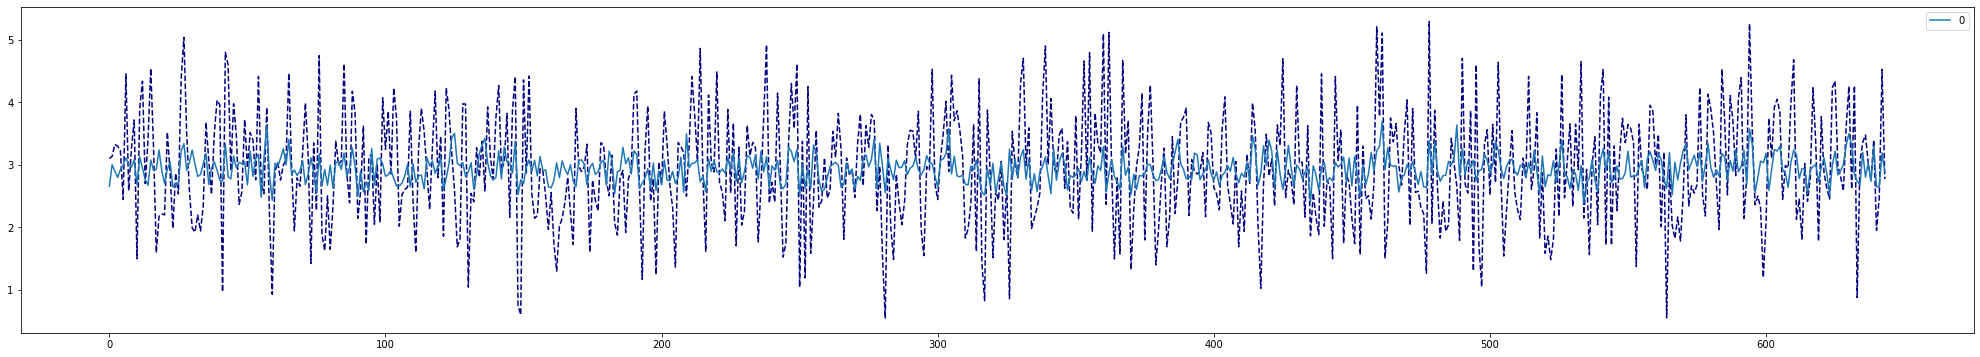

In [81]:
plt.figure(figsize=(35, 6))
sns.lineplot(y_train.values, color='navy', linestyle='--')
sns.lineplot(y_train_pred.values, color='red')
plt.show()

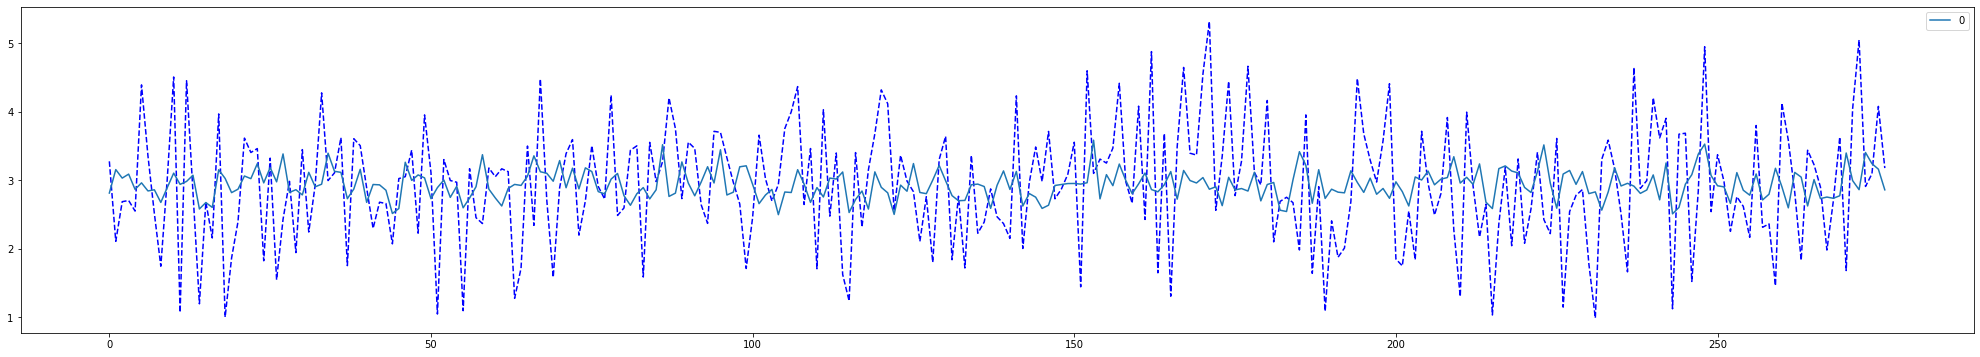

In [82]:
plt.figure(figsize=(35, 6))
sns.lineplot(y_test.values, color='blue', linestyle='--')
sns.lineplot(y_test_pred.values, color='red')
plt.show()

In [83]:
y_train_pred.mean(), y_train_pred.var(), 

(0    2.932345
 dtype: float32,
 0    0.048077
 dtype: float32)

In [84]:
y_test_pred.mean(), y_test_pred.var(),

(0    2.933693
 dtype: float32,
 0    0.044687
 dtype: float32)

In [85]:
X_one_row = X_train_to_use.loc[[2], :]
matrix_filler_best_model_to_use.predict(X_one_row)[0][0]

1/1 [==============================] - 0s 30ms/step


2.6023734